## Logistic Regression multiclass case
We will look on the classic IRIS data set, and construct a classifier for all 3 iris classes based on sepal length (feature 0)


In [64]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
iris = load_iris()
print("size of data {}\nnames of columns {}\ntarget label size {}\nlabel names {}".format(iris.data.shape, iris.feature_names, iris.target.shape, iris.target_names))
#print(iris['data'][:,0:4])

size of data (150, 4)
names of columns ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target label size (150,)
label names ['setosa' 'versicolor' 'virginica']


## Pandas
Now we want to use pandas dataframes to explore the data a bit. Lets create a dataframe for the data and the labels and then join them together so we have everything in one spot.

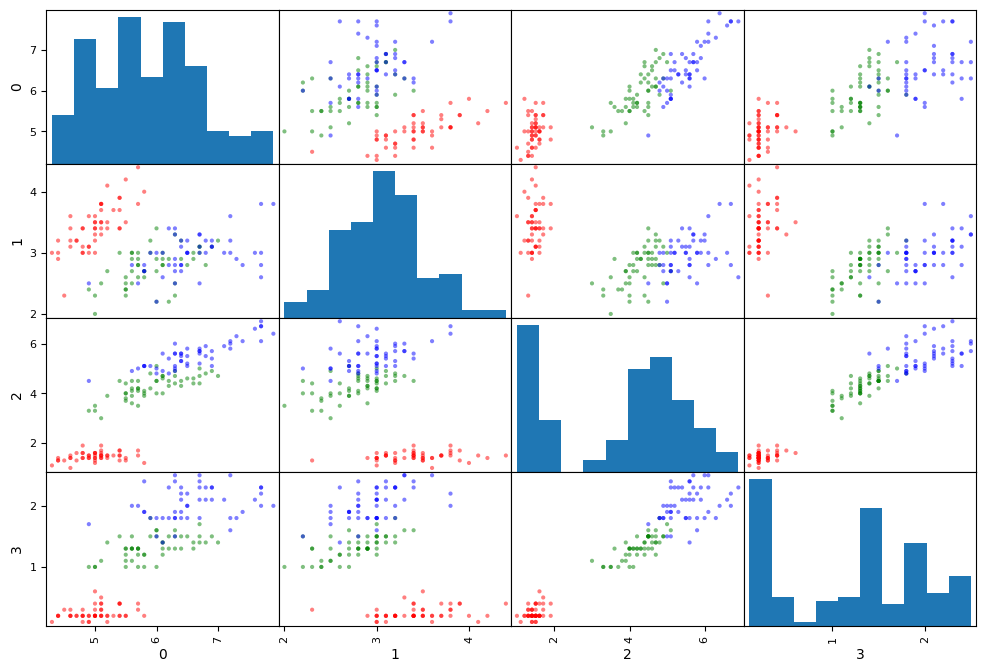

In [65]:
df=pd.DataFrame(iris.data)
colMap={0:"red",1:"green",2:"blue"}
cols=list(map(lambda x:colMap.get(x),iris.target))
scatter_matrix(df,  diagonal='hist',c=cols,figsize = (12,8))
fig1 = plt.gcf()
# from google.colab import files
# plt.savefig("plotiris.pdf")
# files.download("plotiris.pdf")


In [66]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:,0:1].reshape(-1,1) # sepal length
y = iris["target"].reshape(-1,1)   # y = 0,1, or 2
softmaxmodel = LogisticRegression(multi_class="multinomial")
softmaxmodel.fit(X,y)

LogisticRegression(multi_class='multinomial')

(np.float64(4.0), np.float64(8.0), np.float64(-0.02), np.float64(1.02))

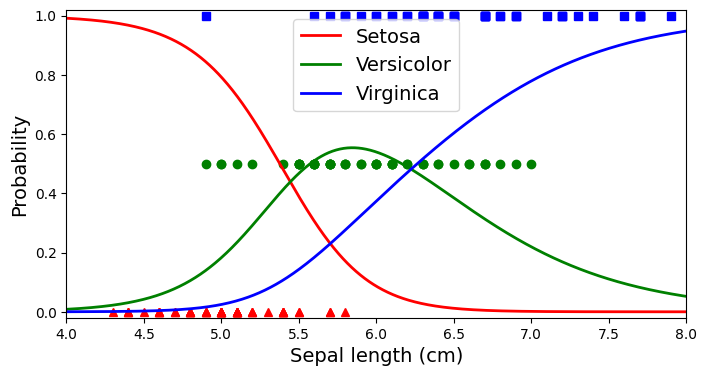

In [67]:
# Plot Setosa probability versus Sepal Length
Xnew = np.linspace(4,8,1000).reshape(-1,1)
yproba = softmaxmodel.predict_proba(Xnew)

plt.figure(figsize=(8, 4))
plt.plot(X[y==2], 0.5*y[y==2], "bs")
plt.plot(X[y==1], 0.5*y[y==1], "go")
plt.plot(X[y==0], y[y==0], "r^")
plt.plot(Xnew,yproba[:,0],"r-",linewidth=2,label = "Setosa")
plt.plot(Xnew,yproba[:,1],"g-",linewidth=2,label = "Versicolor")
plt.plot(Xnew,yproba[:,2],"b-",linewidth=2,label = "Virginica")
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])

#plt.savefig("plotiris3.pdf")
#files.download("plotiris3.pdf")

In [68]:
X2 = iris["data"][:, (0,2)]  # petal length, petal width
y = iris["target"]

softmaxmodel2 = LogisticRegression(multi_class="multinomial",C=5)
softmaxmodel2.fit(X2, y)

LogisticRegression(C=5, multi_class='multinomial')

(np.float64(4.0), np.float64(8.0), np.float64(1.0), np.float64(7.0))

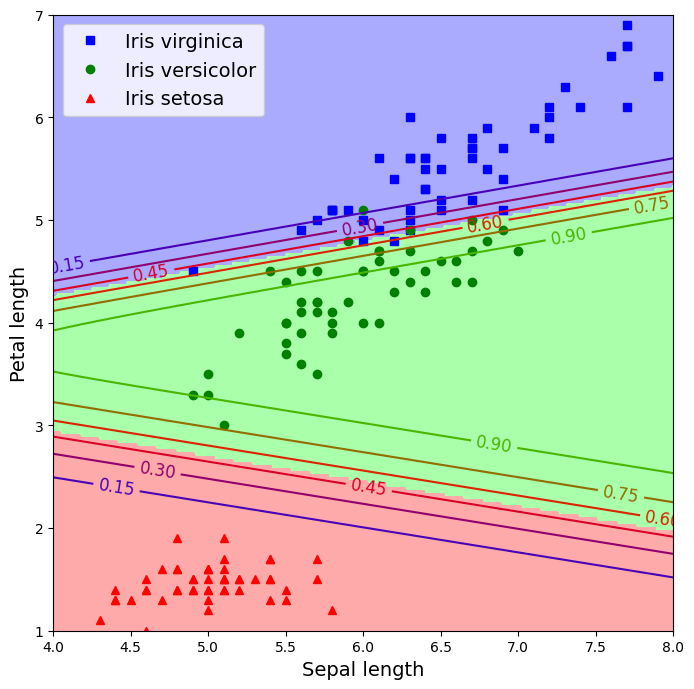

In [69]:
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1, 7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmaxmodel2.predict_proba(X_new)
y_predict = softmaxmodel2.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(8, 8))
plt.plot(X2[y==2, 0], X2[y==2, 1], "bs", label="Iris virginica")
plt.plot(X2[y==1, 0], X2[y==1, 1], "go", label="Iris versicolor")
plt.plot(X2[y==0, 0], X2[y==0, 1], "r^", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ffaaaa','#aaffaa','#aaaaff'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([4, 8, 1, 7])
#plt.savefig("plotiris4.pdf")
#files.download("plotiris4.pdf")

In [70]:
X3 = iris["data"][:, 0:4]  # petal length, petal width, sepal length, sepal width
y = iris["target"]

softmaxmodel3 = LogisticRegression(max_iter=20,multi_class="multinomial",C=5)
softmaxmodel3.fit(X3, y)

score = softmaxmodel3.score(X3, y)
print('{0:.4f}'.format(score))

0.9800


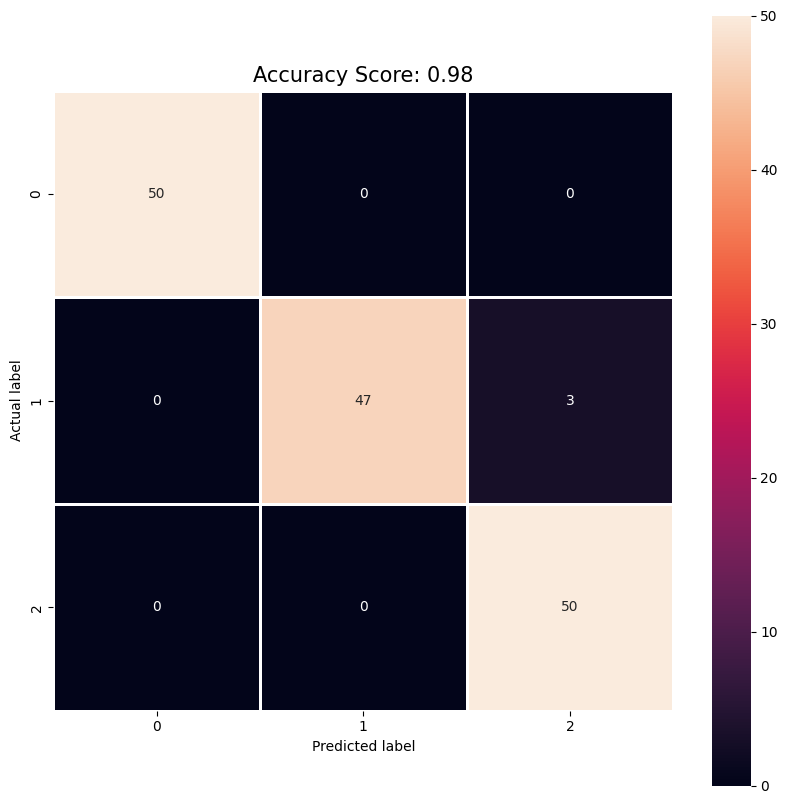

In [72]:
import seaborn as sns
from sklearn import metrics

X3_predict = softmaxmodel3.predict(X3)

cm = metrics.confusion_matrix(y, X3_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

In [62]:
from sklearn.model_selection import cross_val_score
str(np.mean(cross_val_score(softmaxmodel3, X3, y, cv=5)))

'0.9800000000000001'